In [92]:
import numpy as np

# 1. Load original PTB ECG data (no header)
data = np.loadtxt("ptbdb_normal.csv", delimiter=",")

# 2. Separate signal (X_base) and label (we ignore label for now)
signal = data[:, :-1]   # shape: (4046, 187)
labels = data[:, -1]    # shape: (4046,)

print("signal shape:", signal.shape)
print("labels shape:", labels.shape)

# 3. Define smoothing function
def smooth(x, k=7):
    return np.convolve(x, np.ones(k)/k, mode="same")

# 4. Build X and y
X = signal.astype("float32")                          # original ECG
y = np.apply_along_axis(smooth, 1, signal).astype("float32")  # smoothed ECG

print("X shape:", X.shape)   # (4046, 187)
print("y shape:", y.shape)   # (4046, 187)

# 5. Concatenate X and y horizontally: [X | y]
xy = np.hstack([X, y])   # shape: (4046, 374)

print("xy shape:", xy.shape)

# 6. Save to new CSV
np.savetxt("ecg_normal_denoise.csv", xy, delimiter=",")
print("Saved ecg_normal_denoise.csv")


signal shape: (4046, 187)
labels shape: (4046,)
X shape: (4046, 187)
y shape: (4046, 187)
xy shape: (4046, 374)
Saved ecg_normal_denoise.csv


In [93]:
import numpy as np

# 1. Load original PTB ECG data (no header)
data = np.loadtxt("ptbdb_abnormal.csv", delimiter=",")

# 2. Separate signal (X_base) and label (we ignore label for now)
signal = data[:, :-1]   # shape: (4046, 187)
labels = data[:, -1]    # shape: (4046,)

print("signal shape:", signal.shape)
print("labels shape:", labels.shape)

# 3. Define smoothing function
def smooth(x, k=7):
    return np.convolve(x, np.ones(k)/k, mode="same")

# 4. Build X and y
X = signal.astype("float32")                          # original ECG
y = np.apply_along_axis(smooth, 1, signal).astype("float32")  # smoothed ECG

print("X shape:", X.shape)   # (4046, 187)
print("y shape:", y.shape)   # (4046, 187)

# 5. Concatenate X and y horizontally: [X | y]
xy = np.hstack([X, y])   # shape: (4046, 374)

print("xy shape:", xy.shape)

# 6. Save to new CSV
np.savetxt("ecg_abnormal_denoise.csv", xy, delimiter=",")
print("Saved ecg_abnormal_denoise.csv")


signal shape: (10506, 187)
labels shape: (10506,)
X shape: (10506, 187)
y shape: (10506, 187)
xy shape: (10506, 374)
Saved ecg_abnormal_denoise.csv


# ___________________________________

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Load the prepared dataset (374 columns: 187 X + 187 Y)
xy = np.loadtxt("ecg_normal_denoise.csv", delimiter=",")

print("xy shape:", xy.shape)   # (4046, 374)


xy shape: (4046, 374)


In [95]:
n_features = 187

X = xy[:, :n_features]       # original ECG
Y = xy[:, n_features:]       # smoothed ECG


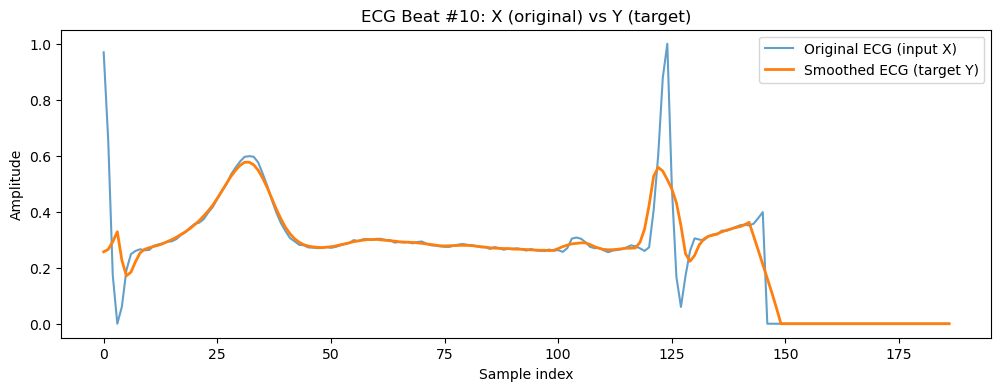

In [96]:
idx = 10  # choose any sample index

x_beat = X[idx]
y_beat = Y[idx]

plt.figure(figsize=(12,4))
plt.plot(x_beat, label="Original ECG (input X)", alpha=0.7)
plt.plot(y_beat, label="Smoothed ECG (target Y)", linewidth=2)
plt.title(f"ECG Beat #{idx}: X (original) vs Y (target)")
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


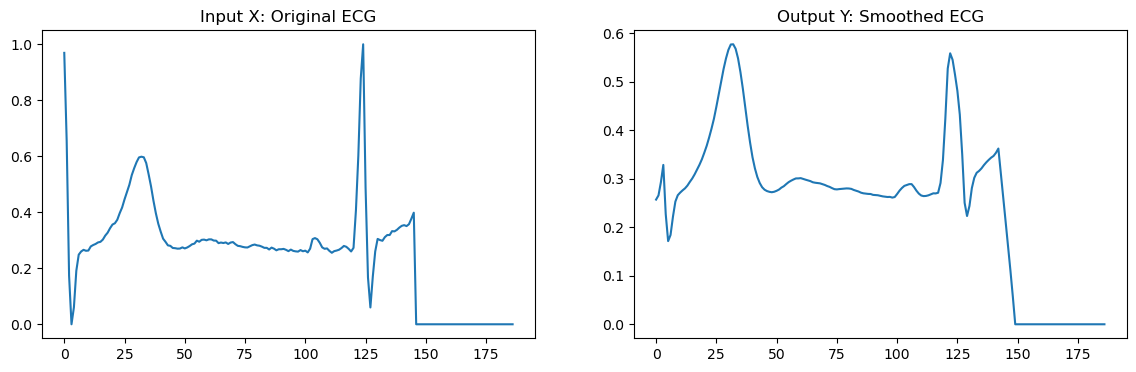

In [97]:
fig, axs = plt.subplots(1,2, figsize=(14,4))

axs[0].plot(x_beat)
axs[0].set_title("Input X: Original ECG")

axs[1].plot(y_beat)
axs[1].set_title("Output Y: Smoothed ECG")

plt.show()


In [98]:
print("X shape:", X.shape)  # (4046, 187)
print("y shape:", y.shape)  # (4046, 187)

X shape: (4046, 187)
y shape: (10506, 187)


In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,      # 20% for test
    random_state=42,    # reproducible
    shuffle=True        # always shuffle ECG beats
)

print("Train shapes:", X_train.shape, Y_train.shape)
print("Test shapes:",  X_test.shape, Y_test.shape)

Train shapes: (3236, 187) (3236, 187)
Test shapes: (810, 187) (810, 187)


| Activation  | Code        | When to use                                              |
| ----------- | ----------- | -------------------------------------------------------- |
| **ReLU**    | `"relu"`    | Best default; fast; learns peaks; no vanishing gradients |
| **Sigmoid** | `"sigmoid"` | Binary classification output (0 or 1)                    |
| **Tanh**    | `"tanh"`    | RNNs, or centered outputs needed (-1 to +1)              |
| **Softmax** | `"softmax"` | Multiclass classification output (probabilities)         |
| **Linear**  | `"linear"`  | Output layer for regression                              |


Test MSE: 0.0002248364471597597
26/26 [==============================] - 0s 866us/step


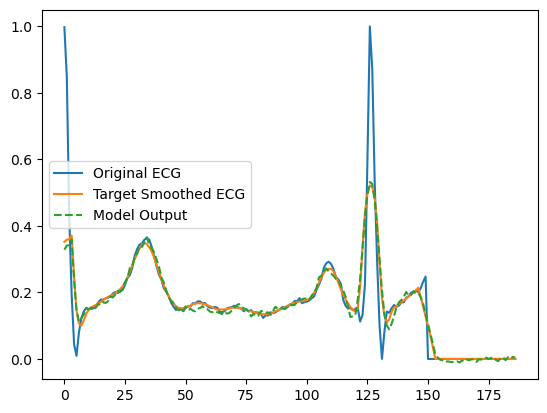

In [101]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt




# 3. Define model (same style as your Celsius→Fahrenheit example)
l0 = tf.keras.layers.Dense(units=3, input_shape=[n_features])
l1 = tf.keras.layers.Dense(units=2)
l2 = tf.keras.layers.Dense(units=n_features)
model_itial = tf.keras.Sequential([l0, l1, l2])




#model_2
l0 = tf.keras.layers.Dense(units=3, input_shape=[n_features])
l1 = tf.keras.layers.Dense(units=3)
l2 = tf.keras.layers.Dense(units=6)
l3 = tf.keras.layers.Dense(units=9)
l4 = tf.keras.layers.Dense(units=12)
l_out = tf.keras.layers.Dense(units=n_features)

model_initial_2 = tf.keras.Sequential([l0, l1, l2, l3, l4, l_out])



#model_2
l0    = tf.keras.layers.Dense(units=3, activation='relu', input_shape=[n_features])
l1    = tf.keras.layers.Dense(units=6, activation='relu')
l2    = tf.keras.layers.Dense(units=6, activation='relu')
l3    = tf.keras.layers.Dense(units=9, activation='relu')
l4    = tf.keras.layers.Dense(units=12, activation='relu')
l_out = tf.keras.layers.Dense(units=n_features)

model_act_fun_1 = tf.keras.Sequential([l0,l1, l2, l3, l4, l_out])




#model_3
l0    = tf.keras.layers.Dense(units=32, activation='relu', input_shape=[n_features])
l1    = tf.keras.layers.Dense(units=64, activation='relu')
l2    = tf.keras.layers.Dense(units=64, activation='relu')
l3    = tf.keras.layers.Dense(units=64, activation='relu')
l4    = tf.keras.layers.Dense(units=32, activation='relu')
l_out = tf.keras.layers.Dense(units=n_features)   # keep this linear

model_act_fun_2 = tf.keras.Sequential([l0, l1, l2, l3,l4, l_out])





#model_3
l0    = tf.keras.layers.Dense(units=32,  input_shape=[n_features])
l1    = tf.keras.layers.Dense(units=64)
l_out = tf.keras.layers.Dense(units=n_features)   # keep this linear

model_eff = tf.keras.Sequential([l0, l1,  l_out])



model = model_eff


model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(0.001))
# 4. Train
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,   # 10% of training used for validation
    verbose=0
)

test_loss = model.evaluate(X_test, Y_test, verbose=0)
print("Test MSE:", test_loss)

Y_pred = model.predict(X_test)




idx = 0
orig = X_test[idx]
true = Y_test[idx]
pred = Y_pred[idx]

plt.plot(orig, label="Original ECG")
plt.plot(true, label="Target Smoothed ECG")
plt.plot(pred, '--', label="Model Output")
plt.legend()
plt.show()


In [91]:
model.summary()

Model: "sequential_197"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_898 (Dense)           (None, 32)                6016      
                                                                 
 dense_899 (Dense)           (None, 64)                2112      
                                                                 
 dense_900 (Dense)           (None, 187)               12155     
                                                                 
Total params: 20,283
Trainable params: 20,283
Non-trainable params: 0
_________________________________________________________________


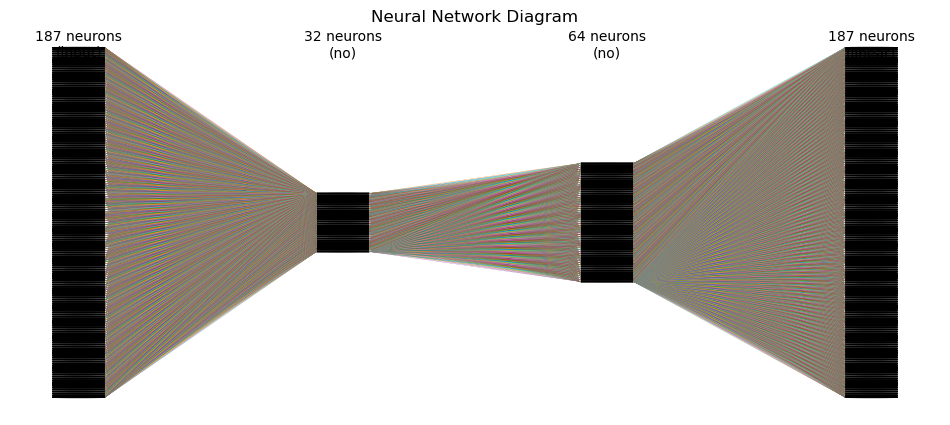

In [71]:
import matplotlib.pyplot as plt

def draw_network(layers, activations):
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.axis('off')

    x_spacing = 2
    max_neurons = max(layers)
    
    for i, (num_neurons, act) in enumerate(zip(layers, activations)):
        x = i * x_spacing
        y_start = (max_neurons - num_neurons) / 2

        for j in range(num_neurons):
            y = y_start + j
            circle = plt.Circle((x, y), radius=0.2, fill=False)
            ax.add_patch(circle)
            
            # Draw connections to previous layer
            if i > 0:
                prev_neurons = layers[i-1]
                prev_y_start = (max_neurons - prev_neurons) / 2
                for k in range(prev_neurons):
                    y_prev = prev_y_start + k
                    ax.plot([x - x_spacing + 0.2, x - 0.2], [y_prev, y], linewidth=0.2)

        ax.text(x, max_neurons + 0.5, f"{num_neurons} neurons\n({act})",
                ha='center', va='center')

    plt.title("Neural Network Diagram")
    plt.show()


layers = [187, 32, 64, 187]
activations = ["input", "relu", "relu", "relu", "relu", "relu", "linear"]
activations = ["input", "no", "no", "linear"]
draw_network(layers, activations)


In [ ]:
# choose an index from test set
idx = 5

single_x = X_test[idx]               # shape (187,)
print("Shape before reshap:", single_x.shape)
single_x = single_x.reshape(1, -1)   # shape becomes (1, 187)
print("Shape after reshap:", single_x.shape)

single_pred = model.predict(single_x)  # predicted smoothed ECG

print("Prediction shape:", single_pred)


Shape before reshap: (187,)
1/1 [==============================] - 0s 25ms/step
Prediction shape: [[3.35392475e-01 3.43176842e-01 3.66795778e-01 4.02343810e-01
  3.04843754e-01 2.34292075e-01 2.17986181e-01 2.46303946e-01
  2.86494106e-01 3.10722172e-01 3.23241264e-01 3.29766810e-01
  3.33801180e-01 3.38594019e-01 3.42824906e-01 3.46283615e-01
  3.49332064e-01 3.52716208e-01 3.56210619e-01 3.61790091e-01
  3.64154160e-01 3.69974285e-01 3.79964501e-01 3.96674693e-01
  3.99295926e-01 4.15923119e-01 4.35500652e-01 4.67204690e-01
  4.86012578e-01 5.10951519e-01 5.36932945e-01 5.58485329e-01
  5.77035367e-01 5.86656570e-01 5.89310050e-01 5.86957633e-01
  5.76643109e-01 5.63180923e-01 5.42155683e-01 5.15423775e-01
  4.91004348e-01 4.65245724e-01 4.34933245e-01 4.14391130e-01
  3.92921418e-01 3.69118840e-01 3.55661720e-01 3.42029124e-01
  3.26963753e-01 3.21692258e-01 3.15423787e-01 3.06101531e-01
  3.08407873e-01 3.06481957e-01 3.01836073e-01 3.01857114e-01
  3.08065951e-01 3.08205813e-01 3.